In [1]:
import os
os.getcwd()
os.chdir('..')
import numpy as np
from spikeHelper.loadSpike import Rat
import matplotlib.pyplot as plt
%matplotlib inline

# Example usage

## Load data

In [2]:
r7 = Rat(9)
r7.describe()

Label: Rat 9
Bin size: 100
Sigma: 100

No selected trials.

Time bins not selected.


## Restrict data to use

### Select trialsToUse via a restrictions dict of the form {property: value}
##### Accepted properties are:
- 'minDuration', 'maxDuration' (in milisseconds),
- 'trialMin','trialMax' (Absolute number of the trial)
- 'ntrials' (turns off last trials to get a total of ntrials)

In [3]:
r7.selecTrials({'minDuration':1300})
r7.describe()

Label: Rat 9
Bin size: 100
Sigma: 100

Using 566 trials, according to following restrictions:
minDuration: 1300

Time bins not selected.


### Select timebins to use

##### Parameters are tmin and tmax

In [4]:
r7.selecTimes(tmin = 200,tmax=1000)

In [5]:
r7.describe()

Label: Rat 9
Bin size: 100
Sigma: 100

Using 566 trials, according to following restrictions:
minDuration: 1300

Using 8 time bins:
From 200 to 300ms
From 300 to 400ms
From 400 to 500ms
.
.
.
From 800 to 900ms
From 900 to 1000ms


## Access selected data

### Via cubicNeuronTimeTrial
3d array with:
- 1st dimension: Neuron
- 2nd dimension: Time bin
- 3rd dimension: Trial Number

$\textbf{Note:}$ Although times start at 0 and end at N, that do not mean the timebins are 0..N, they are really the ones that have been selected via selecTimes

In [6]:
ntt = r7.cubicNeuronTimeTrial()
ntt.shape

(29, 8, 566)

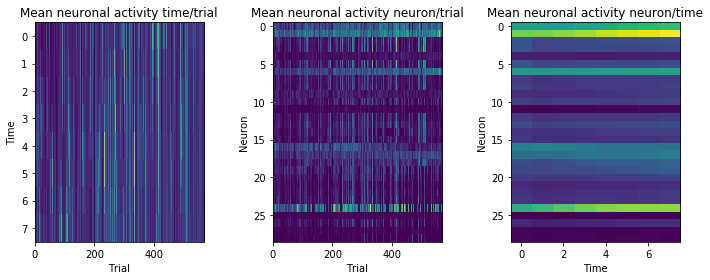

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(r7.cubicNeuronTimeTrial().mean(axis=0),aspect='auto') # Marginalizando neuronios
plt.title('Mean neuronal activity time/trial')
plt.xlabel('Trial'); plt.ylabel('Time')

plt.subplot(1,3,2)
plt.imshow(r7.cubicNeuronTimeTrial().mean(axis=1),aspect='auto') # Marginalizando tempos
plt.title('Mean neuronal activity neuron/trial')
plt.xlabel('Trial'); plt.ylabel('Neuron')

plt.subplot(1,3,3)
plt.imshow(r7.cubicNeuronTimeTrial().mean(axis=2),aspect='auto') # Marginalizando trials
plt.title('Mean neuronal activity neuron/time')
plt.xlabel('Time'); plt.ylabel('Neuron')
plt.tight_layout()

### Via X, y, trial

Rat.X is presented in long format for classifying, and accompanies Rat.y for class and Rat.trial for selecting trials

In [8]:
print('Shape {}'.format(r7.X.shape))
r7.X

Shape (4528, 29)


array([[ 22.22650423,   5.9020989 ,  10.36995537, ...,   5.78515864,
          1.81846856,   0.        ],
       [ 23.25147818,   7.33681691,   8.75188281, ...,   2.26758102,
          3.70217693,   0.        ],
       [ 18.61383017,  17.8045153 ,   4.92436649, ...,   3.06024859,
          3.01288957,   0.        ],
       ..., 
       [ 12.67929998,  48.65154935,   1.95701835, ...,   0.69794731,
          0.        ,   0.69876709],
       [ 11.94831764,  48.53054004,   3.78986416, ...,   3.11111808,
          0.        ,   2.62754191],
       [ 18.5136709 ,  36.30004798,   2.86690883, ...,  10.29737493,
          0.        ,   3.84787689]])

In [9]:
print('Shape {}'.format(r7.y.shape))
r7.y

Shape (4528,)


array([2, 3, 4, ..., 7, 8, 9])

In [10]:
print('Shape {}'.format(r7.trial.shape))
r7.trial

Shape (4528,)


array([  0,   0,   0, ..., 931, 931, 931])

## Visualize data

### Via interact

In [11]:
r7.interact(realTime=True)

interactive(children=(ToggleButtons(description='neurons', options=('Plot', 'Marginalize', 'Select'), tooltips=['Show in chart', 'Take mean of values in range', 'Get specific value'], value='Plot'), ToggleButtons(description='times', options=('Plot', 'Marginalize', 'Select'), tooltips=['Show in chart', 'Take mean of values in range', 'Get specific value'], value='Plot'), ToggleButtons(description='trials', options=('Plot', 'Marginalize', 'Select'), tooltips=['Show in chart', 'Take mean of values in range', 'Get specific value'], value='Plot'), Output()), _dom_classes=('widget-interact',))